### FBI Hate Crime Database Analysis

The data downloaded from the [FBI website](https://www.fbi.gov/news/pressrel/press-releases/fbi-releases-2020-hate-crime-statistics) for hate crimes was uploaded in this code, filtered, and analyzed. The data contains records of hate crimes from 1991 to 2020, with around 200,000 total entries. This data was analyzed for the purposes of the Introduction to Data Science course at the University of Utah. This particular Notebook creates pie charts of the breakdown of various variables regarding hate crime such as: offender race, victim bias, type of crime, and location of crime (by state and category). This Notebook also creates a csv for aapi crimes by state by white individuals. 

It is recommended to run this code only using 1000 data points instead of the full length of the data set "filtered_data".

In [3]:
# Import libraries and the csv file
import random
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import scipy as sc
import statsmodels.formula.api as sm
import csv
from matplotlib import cm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

data = pd.read_csv("Data/hate_crime.csv")

C:\Users\arian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Filter whole data frame to have only the data we want to look at
filtered_data = data.drop(columns = ["PUB_AGENCY_UNIT", "STATE_NAME","ADULT_VICTIM_COUNT", "JUVENILE_VICTIM_COUNT", "ADULT_OFFENDER_COUNT", "JUVENILE_OFFENDER_COUNT"] )

In [5]:
# Count the number of hate crimes committed by different populations
offender_race_counter = [0, 0, 0, 0, 0, 0]

i = 0
while i < len(filtered_data):
        
    # For offender race, white = 1, black/african american = 2, asian = 3, multiple = 4, unknown = 5, other = 6
    if filtered_data.iloc[i,12] == "White":
        filtered_data.iloc[i,12] = 1
        offender_race_counter[0] += 1
        
    elif filtered_data.iloc[i,12] == "Black or African American":
        filtered_data.iloc[i,12] = 2
        offender_race_counter[1] += 1

    elif filtered_data.iloc[i,12] == "Asian":
        filtered_data.iloc[i,12] = 3
        offender_race_counter[2] += 1

    elif filtered_data.iloc[i,12] == "Multiple":
        filtered_data.iloc[i,12] = 4
        offender_race_counter[3] += 1

    elif filtered_data.iloc[i,12] == "Unknown":
        filtered_data.iloc[i,12] = 5
        offender_race_counter[4] += 1

    else:
        filtered_data.iloc[i,12] = 6      
        offender_race_counter[5] += 1

    i += 1

In [6]:
# Count the hate crimes for different violence categories
violence_counter = [0] * 7
i = 0
while i < len(filtered_data):
    # For offense type, 1 = intimidation, 2 = simple assault, 3 = Aggravated Assault, 4 = robbery, 
    # 5 =  murder and nonnegligent manslaughter, 6 = arson, 7 = multiple types or other
    if filtered_data.iloc[i,15] == "Intimidation":
        filtered_data.iloc[i,15] = 1
        violence_counter[0] += 1
    elif filtered_data.iloc[i,15] == "Simple Assault":
        filtered_data.iloc[i,15] = 2
        violence_counter[1] += 1
    elif filtered_data.iloc[i,15] == "Aggravated Assault":
        filtered_data.iloc[i,15] = 3
        violence_counter[2] += 1
    elif filtered_data.iloc[i,15] == "Robbery":
        filtered_data.iloc[i,15] = 4
        violence_counter[3] += 1
    elif filtered_data.iloc[i,15] == "Murder and Nonnegligent Manslaughter":
        filtered_data.iloc[i,15] = 5
        violence_counter[4] += 1
    elif filtered_data.iloc[i,15] == "Arson":
        filtered_data.iloc[i,15] = 6
        violence_counter[5] += 1
    else:
        filtered_data.iloc[i,15] = 7  
        violence_counter[6] += 1
    i += 1




In [7]:
# Use data to count number of crimes committed in each of the locations from the FBI website
location_counter = [0] * 19
i = 0
while i < len(filtered_data):
    
    # For location type, 1 = highway/street, 2 = residence/home, 3 = religious building, 4 = school, 5 = supermarket, 6 = office building, 
    # 7 = transportation, 8 = hotel/motel, 9 = convenience store, 10 = bar, 11 = parking area, 12 = medical building,
    # 13 = Government/Public Building, 14 = Jail, 15 = Field/Woods, 16 = Bank, 17 = Specialty Store, 18 = Service/Gas Station 
    # 19 = other
    if filtered_data.iloc[i,17] == "Highway/Road/Alley/Street/Sidewalk":
        filtered_data.iloc[i,17] = 1
        location_counter[0] += 1
        
    elif filtered_data.iloc[i,17] == "Residence/Home":
        filtered_data.iloc[i,17] = 2
        location_counter[1] += 1
        
    elif filtered_data.iloc[i,17] == "Church/Synagogue/Temple/Mosque":
        filtered_data.iloc[i,17] = 3
        location_counter[2] += 1
        
    elif filtered_data.iloc[i,17] == "School/College":
        filtered_data.iloc[i,17] = 4
        location_counter[3] += 1
        
    elif filtered_data.iloc[i,17] == "Grocery/Supermarket":
        filtered_data.iloc[i,17] = 5
        location_counter[4] += 1
        
    elif filtered_data.iloc[i,17] == "Commercial/Office Building":
        filtered_data.iloc[i,17] = 6
        location_counter[5] += 1
        
    elif filtered_data.iloc[i,17] == "Air/Bus/Train Terminal":
        filtered_data.iloc[i,17] = 7
        location_counter[6] += 1
        
    elif filtered_data.iloc[i,17] == "Hotel/Motel/Etc.":
        filtered_data.iloc[i,17] = 8
        location_counter[7] += 1
        
    elif filtered_data.iloc[i,17] == "Convenience Store":
        filtered_data.iloc[i,17] = 9
        location_counter[8] += 1
        
    elif filtered_data.iloc[i,17] == "Bar/Nightclub":
        filtered_data.iloc[i,17] = 10
        location_counter[9] += 1
        
    elif filtered_data.iloc[i,17] == "Parking/Drop Lot/Garage":
        filtered_data.iloc[i,17] = 11
        location_counter[10] += 1
        
    elif filtered_data.iloc[i,17] == "Drug Store/Doctor's Office/Hospital":
        filtered_data.iloc[i,17] = 12
        location_counter[11] += 1 
        
    elif filtered_data.iloc[i,17] == "Government/Public Building":
        filtered_data.iloc[i,17] = 13
        location_counter[12] += 1
        
    elif filtered_data.iloc[i,17] == "Jail/Prison/Penitentiary/Corrections Facility":
        filtered_data.iloc[i,17] = 14
        location_counter[13] += 1 
        
    elif filtered_data.iloc[i,17] == "Field/Woods":
        filtered_data.iloc[i,17] = 15
        location_counter[14] += 1 
    
    elif filtered_data.iloc[i,17] == "Bank/Savings and Loan": 
        filtered_data.iloc[i,17] = 16
        location_counter[15] += 1 
        
    elif filtered_data.iloc[i,17] == "Specialty Store":
        filtered_data.iloc[i,17] = 17
        location_counter[16] += 1 
    
    elif filtered_data.iloc[i,17] == "Service/Gas Station":
        filtered_data.iloc[i,17] = 18
        location_counter[17] += 1 
        
    else:
        filtered_data.iloc[i,17] = 19  
        location_counter[18] += 1
    
    i += 1

In [8]:
# Use data to count the crimes committed against various groups
bias_description_counter = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

i = 0
while i < len(filtered_data):
    # For bias description, 1 = anti-black, 2 = anti-white, 3 = anti-jewish, 4 = anti-arab, 5 = anti-islamic, 
    # 6 = anti protestant, 7 = anti-catholic, 8 = anti- other religion, 9 = anti-gay (male), 10 = anti-gay (female)
    # 11 = anti-asian, 12 = anti-hispanic, 13 = anti-lgbt, 14 = anti-native american, 15 = anti-mental disability
    # 16 = anti-sikh, 17 = anti-physical disability, 18 = anti-transgender
    
    if filtered_data.iloc[i,18] == "Anti-Black or African American":
        filtered_data.iloc[i,18] = 1
        bias_description_counter[0] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-White":
        filtered_data.iloc[i,18] = 2
        bias_description_counter[1] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Jewish":
        filtered_data.iloc[i,18] = 3
        bias_description_counter[2] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Arab":
        filtered_data.iloc[i,18] = 4
        bias_description_counter[3] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Islamic (Muslim)":
        filtered_data.iloc[i,18] = 5
        bias_description_counter[4] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Protestant":
        filtered_data.iloc[i,18] = 6
        bias_description_counter[5] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Catholic":
        filtered_data.iloc[i,18] = 7
        bias_description_counter[6] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Other Religion":
        filtered_data.iloc[i,18] = 8
        bias_description_counter[7] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Gay (Male)":
        filtered_data.iloc[i,18] = 9
        bias_description_counter[8] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Lesbian (Female)":
        filtered_data.iloc[i,18] = 10
        bias_description_counter[9] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Asian":
        filtered_data.iloc[i,18] = 11
        bias_description_counter[10] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Hispanic or Latino":
        filtered_data.iloc[i,18] = 12
        bias_description_counter[11] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)":
        filtered_data.iloc[i,18] = 13
        bias_description_counter[12] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-American Indian or Alaska Native":
        filtered_data.iloc[i,18] = 14
        bias_description_counter[13] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Mental Disability":
        filtered_data.iloc[i,18] = 15
        bias_description_counter[14] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Sikh":
        filtered_data.iloc[i,18] = 16
        bias_description_counter[15] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Physical Disability":
        filtered_data.iloc[i,18] = 17
        bias_description_counter[16] += 1
        
    elif filtered_data.iloc[i,18] == "Anti-Transgender":
        filtered_data.iloc[i,18] = 18
        bias_description_counter[17] += 1
        
    elif filtered_data.iloc[i,18] == "Native Hawaiian or Other Pacific Islander":
        filtered_data.iloc[i,19] = 19
        bias_description_counter[18] += 1
        
    else:
        filtered_data.iloc[i,18] = 20
        bias_description_counter[19] += 1
        
    i += 1

    

In [9]:
# Use data to count the number of hate crimes in every state, the number of aapi crimes, and the number of crimes 
# committed by white individuals per state. 
state_counter = [0] * 54
aapi_counter = [0] * 54
white_offender_counter = [0] * 54

i = 0
while i < 219577:
    # For state, organized alphabetically.
    if filtered_data.iloc[i,5] == "AL":
        filtered_data.iloc[i,5] = 1
        state_counter[0] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[0] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[0] += 1
             
    elif filtered_data.iloc[i,5] == "AK":
        filtered_data.iloc[i,5] = 2
        state_counter[1] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[1] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[1] += 1
            
    elif filtered_data.iloc[i,5] == "AZ":
        filtered_data.iloc[i,5] = 3
        state_counter[2] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[2] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[2] += 1
                
    elif filtered_data.iloc[i,5] == "AR":
        filtered_data.iloc[i,5] = 4
        state_counter[3] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[3] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[3] += 1
                   
    elif filtered_data.iloc[i,5] == "CA":
        filtered_data.iloc[i,5] = 5
        state_counter[4] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[4] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[4] += 1
                    
    elif filtered_data.iloc[i,5] == "CO":
        filtered_data.iloc[i,5] = 6
        state_counter[5] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[5] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[5] += 1
                    
    elif filtered_data.iloc[i,5] == "CT":
        filtered_data.iloc[i,5] = 7
        state_counter[6] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[6] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[6] += 1
                    
    elif filtered_data.iloc[i,5] == "DE":
        filtered_data.iloc[i,5] = 8
        state_counter[7] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[7] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[7] += 1
                    
    elif filtered_data.iloc[i,5] == "FL":
        filtered_data.iloc[i,5] = 9
        state_counter[8] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[8] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[8] += 1
                    
    elif filtered_data.iloc[i,5] == "GA":
        filtered_data.iloc[i,5] = 10
        state_counter[9] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[9] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[9] += 1
                    
    elif filtered_data.iloc[i,5] == "HI":
        filtered_data.iloc[i,5] = 11
        state_counter[10] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[10] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[10] += 1
                    
    elif filtered_data.iloc[i,5] == "ID":
        filtered_data.iloc[i,5] = 12
        state_counter[11] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[11] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[11] += 1
                    
    elif filtered_data.iloc[i,5] == "IL":
        filtered_data.iloc[i,5] = 13
        state_counter[12] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[12] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[12] += 1
                    
    elif filtered_data.iloc[i,5] == "IN":
        filtered_data.iloc[i,5] = 14
        state_counter[13] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[13] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[13] += 1
                    
    elif filtered_data.iloc[i,5] == "IA":
        filtered_data.iloc[i,5] = 15
        state_counter[14] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[14] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[14] += 1
                    
    elif filtered_data.iloc[i,5] == "KS":
        filtered_data.iloc[i,5] = 16
        state_counter[15] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[15] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[15] += 1
                    
    elif filtered_data.iloc[i,5] == "KY":
        filtered_data.iloc[i,5] = 17
        state_counter[16] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[16] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[16] += 1
                    
    elif filtered_data.iloc[i,5] == "LA":
        filtered_data.iloc[i,5] = 18
        state_counter[17] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[17] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[17] += 1
                    
    elif filtered_data.iloc[i,5] == "ME":
        filtered_data.iloc[i,5] = 19
        state_counter[18] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[18] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[18] += 1
                    
    elif filtered_data.iloc[i,5] == "MD":
        filtered_data.iloc[i,5] = 20
        state_counter[19] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[19] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[19] += 1
                    
    elif filtered_data.iloc[i,5] == "MA":
        filtered_data.iloc[i,5] = 21
        state_counter[20] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[20] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[20] += 1
                    
    elif filtered_data.iloc[i,5] == "MI":
        filtered_data.iloc[i,5] = 22
        state_counter[21] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[21] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[21] += 1
                    
    elif filtered_data.iloc[i,5] == "MN":
        filtered_data.iloc[i,5] = 23
        state_counter[22] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[22] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[22] += 1
                    
    elif filtered_data.iloc[i,5] == "MS":
        filtered_data.iloc[i,5] = 24
        state_counter[23] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[23] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[23] += 1
                    
    elif filtered_data.iloc[i,5] == "MO":
        filtered_data.iloc[i,5] = 25
        state_counter[24] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[24] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[24] += 1
                    
    elif filtered_data.iloc[i,5] == "MT":
        filtered_data.iloc[i,5] = 26
        state_counter[25] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[25] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[25] += 1
                    
    elif filtered_data.iloc[i,5] == "NB":
        filtered_data.iloc[i,5] = 27
        state_counter[26] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[26] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[26] += 1
                    
    elif filtered_data.iloc[i,5] == "NV":
        filtered_data.iloc[i,5] = 28
        state_counter[27] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[27] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[27] += 1
                    
    elif filtered_data.iloc[i,5] == "NH":
        filtered_data.iloc[i,5] = 29
        state_counter[28] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[28] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[28] += 1
                    
    elif filtered_data.iloc[i,5] == "NJ":
        filtered_data.iloc[i,5] = 30
        state_counter[29] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[29] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[29] += 1
                    
    elif filtered_data.iloc[i,5] == "NM":
        filtered_data.iloc[i,5] = 31
        state_counter[30] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[30] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[30] += 1
                    
    elif filtered_data.iloc[i,5] == "NY":
        filtered_data.iloc[i,5] = 32
        state_counter[31] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[31] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[31] += 1
                    
    elif filtered_data.iloc[i,5] == "NC":
        filtered_data.iloc[i,5] = 33
        state_counter[32] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[32] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[32] += 1
                    
    elif filtered_data.iloc[i,5] == "ND":
        filtered_data.iloc[i,5] = 34
        state_counter[33] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[33] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[33] += 1
                    
    elif filtered_data.iloc[i,5] == "OH":
        filtered_data.iloc[i,5] = 35
        state_counter[34] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[34] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[34] += 1
                    
    elif filtered_data.iloc[i,5] == "OK":
        filtered_data.iloc[i,5] = 36
        state_counter[35] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[35] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[35] += 1
                    
    elif filtered_data.iloc[i,5] == "OR":
        filtered_data.iloc[i,5] = 37
        state_counter[36] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[36] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[36] += 1
                    
    elif filtered_data.iloc[i,5] == "PA":
        filtered_data.iloc[i,5] = 38
        state_counter[37] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[37] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[37] += 1
                    
    elif filtered_data.iloc[i,5] == "RI":
        filtered_data.iloc[i,5] = 39
        state_counter[38] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[38] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[38] += 1
                    
    elif filtered_data.iloc[i,5] == "SC":
        filtered_data.iloc[i,5] = 40
        state_counter[39] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[39] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[39] += 1
                    
    elif filtered_data.iloc[i,5] == "SD":
        filtered_data.iloc[i,5] = 41
        state_counter[40] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[40] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[40] += 1
                    
    elif filtered_data.iloc[i,5] == "TN":
        filtered_data.iloc[i,5] = 42
        state_counter[41] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[41] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[41] += 1
                    
    elif filtered_data.iloc[i,5] == "TX":
        filtered_data.iloc[i,5] = 43
        state_counter[42] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[42] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[42] += 1
                    
    elif filtered_data.iloc[i,5] == "UT":
        filtered_data.iloc[i,5] = 44
        state_counter[43] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[43] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[43] += 1
                    
    elif filtered_data.iloc[i,5] == "VT":
        filtered_data.iloc[i,5] = 45
        state_counter[44] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[44] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[44] += 1
                    
    elif filtered_data.iloc[i,5] == "VA":
        filtered_data.iloc[i,5] = 46
        state_counter[45] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[45] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[45] += 1
                    
    elif filtered_data.iloc[i,5] == "WA":
        filtered_data.iloc[i,5] = 47
        state_counter[46] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[46] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[46] += 1
                    
    elif filtered_data.iloc[i,5] == "WV":
        filtered_data.iloc[i,5] = 48
        state_counter[47] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[47] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[47] += 1
                    
    elif filtered_data.iloc[i,5] == "WI":
        filtered_data.iloc[i,5] = 49
        state_counter[48] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[48] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[48] += 1
                    
    elif filtered_data.iloc[i,5] == "WY":
        filtered_data.iloc[i,5] = 50
        state_counter[49] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[49] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[49] += 1
            
    elif filtered_data.iloc[i,5] == "DC":
        filtered_data.iloc[i,5] = 51
        state_counter[50] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[50] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[50] += 1
            
    elif filtered_data.iloc[i,5] == "GM":
        filtered_data.iloc[i,5] = 52
        state_counter[51] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[51] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[51] += 1
            
            
    elif filtered_data.iloc[i,5] == "FS":
        filtered_data.iloc[i,5] = 53
        state_counter[52] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
             aapi_counter[52] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[52] += 1
                    
    else: 
        filtered_data.iloc[i,5] = 54
        state_counter[53] += 1
        if filtered_data.iloc[i,18] == 11 or filtered_data.iloc[i,18] == 19:
            aapi_counter[53] += 1
        if filtered_data.iloc[i,12] == 1:
            white_offender_counter[53] += 1
                
    i += 1

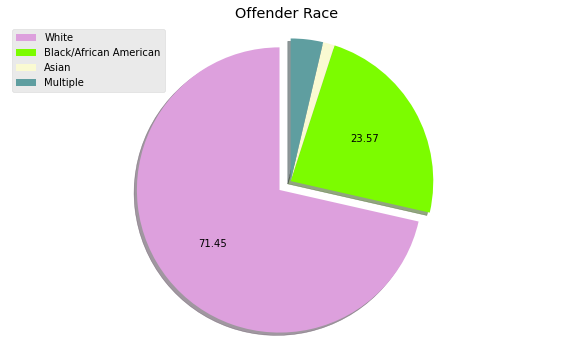

In [38]:
# Pie chart for offender races
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 4)

labels = ["White", "Black/African American", "Asian", "Multiple"]
explode = (.1, 0,0,0)
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 4 else ''

plt.pie(offender_race_counter[0:4],  explode=explode, shadow = True, startangle = 90, autopct = my_autopct, colors=colors)
plt.axis('equal')
plt.title('Offender Race')
plt.legend(labels, loc="best")

plt.show()


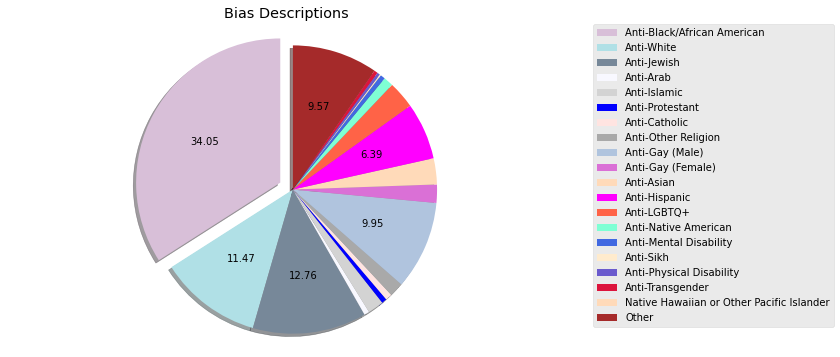

In [36]:
# Pie chart for bias description
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 20)
labels = ["Anti-Black/African American", "Anti-White", "Anti-Jewish", "Anti-Arab", "Anti-Islamic", "Anti-Protestant",
         "Anti-Catholic", "Anti-Other Religion", "Anti-Gay (Male)", "Anti-Gay (Female)", "Anti-Asian", "Anti-Hispanic",
         "Anti-LGBTQ+", "Anti-Native American", "Anti-Mental Disability", "Anti-Sikh", "Anti-Physical Disability",
         "Anti-Transgender", "Native Hawaiian or Other Pacific Islander", 'Other']
explode = (.1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 4 else ''

plt.pie(bias_description_counter, explode=explode, shadow = True, startangle = 90, autopct = my_autopct,
        colors=colors)

plt.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Bias Descriptions")
plt.show()



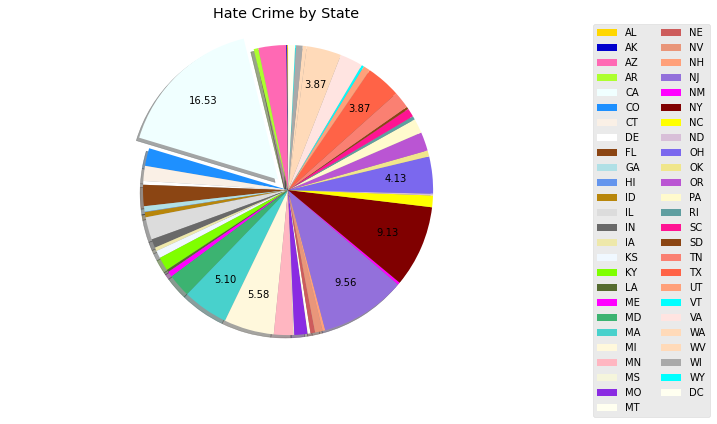

In [32]:
# Pie Chart for Hate Crimes by State
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 54)

labels = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
          'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 
          'RI','SC', 'SD', 'TN', "TX", 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

explode = [0]*51
explode[4] = .1
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3.5 else ''

plt.pie(state_counter[0:51], explode=explode, shadow = True, startangle = 90, autopct = my_autopct, colors=colors,
        pctdistance =.75)
plt.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=2)
plt.title("Hate Crime by State")
plt.show()



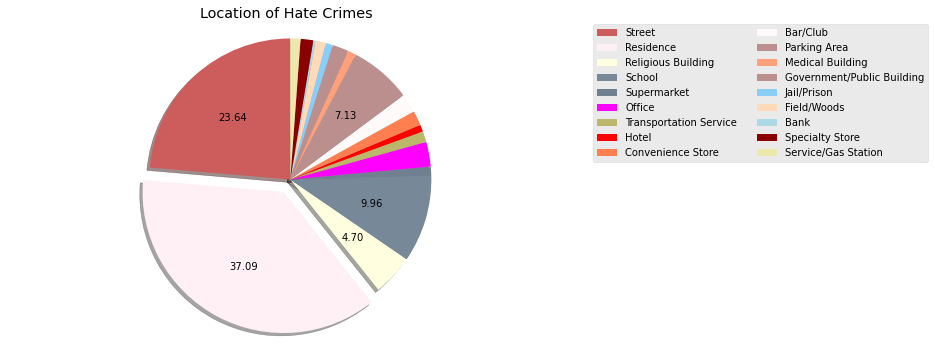

In [13]:
# Pie Chart for Loctation of Crime
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 18)
labels = ["Street", "Residence", "Religious Building", "School", "Supermarket", "Office", 'Transportation Service',
         'Hotel', 'Convenience Store', 'Bar/Club', 'Parking Area', 'Medical Building', 'Government/Public Building',
         'Jail/Prison', 'Field/Woods', 'Bank','Specialty Store', 'Service/Gas Station']
explode = [0] * 18
explode[1] = .1
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 4 else ''

plt.pie(location_counter[0:18], explode=explode, shadow = True, startangle = 90, autopct = my_autopct,
        colors=colors)
plt.axis('equal')
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=2)
plt.title("Location of Hate Crimes")
plt.show()


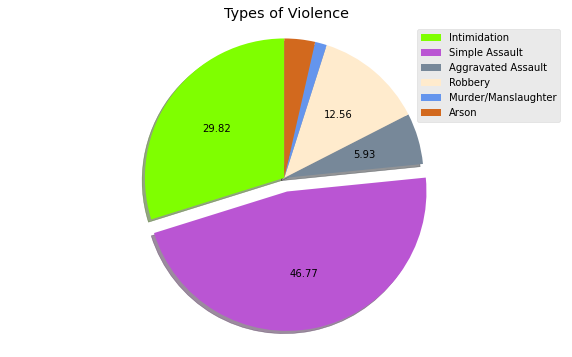

In [45]:
# Pie Chart for Type of Violence of Hate Crimes
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 6)
labels = ['Intimidation', 'Simple Assault', 'Aggravated Assault', 'Robbery',
          'Murder/Manslaughter', 'Arson']
explode = [0] * 6
explode[1] = .1
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 4 else ''

plt.pie(location_counter[0:6], explode=explode, shadow = True, startangle = 90, autopct = my_autopct,
        colors=colors)
plt.axis('equal')
plt.legend(labels)
plt.title("Types of Violence")
plt.show()

In [14]:
state_counter15 = [0] * 54

i = 0
while i < 180613:
    # For state, organized alphabetically.
    if filtered_data.iloc[i,5] == "AL":
        filtered_data.iloc[i,5] = 1
        state_counter15[0] += 1
             
    elif filtered_data.iloc[i,5] == "AK":
        filtered_data.iloc[i,5] = 2
        state_counter15[1] += 1

    elif filtered_data.iloc[i,5] == "AZ":
        filtered_data.iloc[i,5] = 3
        state_counter15[2] += 1
                
    elif filtered_data.iloc[i,5] == "AR":
        filtered_data.iloc[i,5] = 4
        state_counter15[3] += 1
                   
    elif filtered_data.iloc[i,5] == "CA":
        filtered_data.iloc[i,5] = 5
        state_counter15[4] += 1
                    
    elif filtered_data.iloc[i,5] == "CO":
        filtered_data.iloc[i,5] = 6
        state_counter15[5] += 1
                    
    elif filtered_data.iloc[i,5] == "CT":
        filtered_data.iloc[i,5] = 7
        state_counter15[6] += 1
                    
    elif filtered_data.iloc[i,5] == "DE":
        filtered_data.iloc[i,5] = 8
        state_counter15[7] += 1
                    
    elif filtered_data.iloc[i,5] == "FL":
        filtered_data.iloc[i,5] = 9
        state_counter15[8] += 1
                    
    elif filtered_data.iloc[i,5] == "GA":
        filtered_data.iloc[i,5] = 10
        state_counter15[9] += 1
                    
    elif filtered_data.iloc[i,5] == "HI":
        filtered_data.iloc[i,5] = 11
        state_counter15[10] += 1
                    
    elif filtered_data.iloc[i,5] == "ID":
        filtered_data.iloc[i,5] = 12
        state_counter15[11] += 1
                    
    elif filtered_data.iloc[i,5] == "IL":
        filtered_data.iloc[i,5] = 13
        state_counter15[12] += 1
                    
    elif filtered_data.iloc[i,5] == "IN":
        filtered_data.iloc[i,5] = 14
        state_counter15[13] += 1
                    
    elif filtered_data.iloc[i,5] == "IA":
        filtered_data.iloc[i,5] = 15
        state_counter15[14] += 1
                    
    elif filtered_data.iloc[i,5] == "KS":
        filtered_data.iloc[i,5] = 16
        state_counter15[15] += 1
                    
    elif filtered_data.iloc[i,5] == "KY":
        filtered_data.iloc[i,5] = 17
        state_counter15[16] += 1
                    
    elif filtered_data.iloc[i,5] == "LA":
        filtered_data.iloc[i,5] = 18
        state_counter15[17] += 1
                    
    elif filtered_data.iloc[i,5] == "ME":
        filtered_data.iloc[i,5] = 19
        state_counter15[18] += 1
                    
    elif filtered_data.iloc[i,5] == "MD":
        filtered_data.iloc[i,5] = 20
        state_counter15[19] += 1
                    
    elif filtered_data.iloc[i,5] == "MA":
        filtered_data.iloc[i,5] = 21
        state_counter15[20] += 1
                    
    elif filtered_data.iloc[i,5] == "MI":
        filtered_data.iloc[i,5] = 22
        state_counter15[21] += 1
                    
    elif filtered_data.iloc[i,5] == "MN":
        filtered_data.iloc[i,5] = 23
        state_counter15[22] += 1
                    
    elif filtered_data.iloc[i,5] == "MS":
        filtered_data.iloc[i,5] = 24
        state_counter15[23] += 1
                    
    elif filtered_data.iloc[i,5] == "MO":
        filtered_data.iloc[i,5] = 25
        state_counter15[24] += 1
                    
    elif filtered_data.iloc[i,5] == "MT":
        filtered_data.iloc[i,5] = 26
        state_counter15[25] += 1
                    
    elif filtered_data.iloc[i,5] == "NB":
        filtered_data.iloc[i,5] = 27
        state_counter15[26] += 1
                    
    elif filtered_data.iloc[i,5] == "NV":
        filtered_data.iloc[i,5] = 28
        state_counter15[27] += 1
                    
    elif filtered_data.iloc[i,5] == "NH":
        filtered_data.iloc[i,5] = 29
        state_counter15[28] += 1
                    
    elif filtered_data.iloc[i,5] == "NJ":
        filtered_data.iloc[i,5] = 30
        state_counter15[29] += 1
                    
    elif filtered_data.iloc[i,5] == "NM":
        filtered_data.iloc[i,5] = 31
        state_counter15[30] += 1
                    
    elif filtered_data.iloc[i,5] == "NY":
        filtered_data.iloc[i,5] = 32
        state_counter15[31] += 1
                    
    elif filtered_data.iloc[i,5] == "NC":
        filtered_data.iloc[i,5] = 33
        state_counter15[32] += 1
                    
    elif filtered_data.iloc[i,5] == "ND":
        filtered_data.iloc[i,5] = 34
        state_counter15[33] += 1
                    
    elif filtered_data.iloc[i,5] == "OH":
        filtered_data.iloc[i,5] = 35
        state_counter15[34] += 1
                    
    elif filtered_data.iloc[i,5] == "OK":
        filtered_data.iloc[i,5] = 36
        state_counter15[35] += 1
                    
    elif filtered_data.iloc[i,5] == "OR":
        filtered_data.iloc[i,5] = 37
        state_counter15[36] += 1
                    
    elif filtered_data.iloc[i,5] == "PA":
        filtered_data.iloc[i,5] = 38
        state_counter15[37] += 1
        
    elif filtered_data.iloc[i,5] == "RI":
        filtered_data.iloc[i,5] = 39
        state_counter15[38] += 1
                    
    elif filtered_data.iloc[i,5] == "SC":
        filtered_data.iloc[i,5] = 40
        state_counter15[39] += 1
                    
    elif filtered_data.iloc[i,5] == "SD":
        filtered_data.iloc[i,5] = 41
        state_counter15[40] += 1
                    
    elif filtered_data.iloc[i,5] == "TN":
        filtered_data.iloc[i,5] = 42
        state_counter15[41] += 1
                    
    elif filtered_data.iloc[i,5] == "TX":
        filtered_data.iloc[i,5] = 43
        state_counter15[42] += 1
                    
    elif filtered_data.iloc[i,5] == "UT":
        filtered_data.iloc[i,5] = 44
        state_counter15[43] += 1
                    
    elif filtered_data.iloc[i,5] == "VT":
        filtered_data.iloc[i,5] = 45
        state_counter15[44] += 1
                    
    elif filtered_data.iloc[i,5] == "VA":
        filtered_data.iloc[i,5] = 46
        state_counter15[45] += 1
                    
    elif filtered_data.iloc[i,5] == "WA":
        filtered_data.iloc[i,5] = 47
        state_counter15[46] += 1
                    
    elif filtered_data.iloc[i,5] == "WV":
        filtered_data.iloc[i,5] = 48
        state_counter15[47] += 1
                    
    elif filtered_data.iloc[i,5] == "WI":
        filtered_data.iloc[i,5] = 49
        state_counter15[48] += 1
                    
    elif filtered_data.iloc[i,5] == "WY":
        filtered_data.iloc[i,5] = 50
        state_counter15[49] += 1
        
    elif filtered_data.iloc[i,5] == 'DC':
        filtered_data.iloc[i,5] = 51
        state_counter15[50] += 1
    
    elif filtered_data.iloc[i,5] == 'GM':
        filtered_data.iloc[i,5] = 52
        state_counter15[51] += 1
    
    elif filtered_data.iloc[i,5] == 'FS':
        filtered_data.iloc[i,5] = 53
        state_counter15[52] += 1
                    
    else: 
        filtered_data.iloc[i,5] = 54
        state_counter15[53] += 1

                
    i += 1

In [121]:
# This code is used to Create an aapi_by_state csv file

# import csv
# state = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
#           'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 
#           'RI','SC', 'SD', 'TN', "TX", 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC', 'GM', 'FS','Unknown']
# i = 0
# with open('Data/aapi_by_state.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["State", "State Crime Totals in 2020", "Crimes Committed by White Groups Totals","AAPI Crime Totals", 'State Crime Totals in 2015',"Crimes in 2020-Crimes in 2015"])
#     while i < len(state_counter):
#         writer.writerow([state[i],state_counter[i], white_offender_counter[i], aapi_counter[i], state_counter15[i], (state_counter[i]-state_counter15[i])])
#         i += 1
# file.close()

In [15]:
# Year totals of Hate Crime

year_counter = [0]*30

i = 0
while i < len(filtered_data):
    if filtered_data.iloc[i,1] == 1991:
        year_counter[0] += 1
    elif filtered_data.iloc[i,1] == 1992:
        year_counter[1] += 1
    elif filtered_data.iloc[i,1] == 1993:
        year_counter[2] += 1
    elif filtered_data.iloc[i,1] == 1994:
        year_counter[3] += 1
    elif filtered_data.iloc[i,1] == 1995:
        year_counter[4] += 1
    elif filtered_data.iloc[i,1] == 1996:
        year_counter[5] += 1
    elif filtered_data.iloc[i,1] == 1997:
        year_counter[6] += 1
    elif filtered_data.iloc[i,1] == 1998:
        year_counter[7] += 1
    elif filtered_data.iloc[i,1] == 1999:
        year_counter[8] += 1
    elif filtered_data.iloc[i,1] == 2000:
        year_counter[9] += 1
    elif filtered_data.iloc[i,1] == 2001:
        year_counter[10] += 1
    elif filtered_data.iloc[i,1] == 2002:
        year_counter[11] += 1
    elif filtered_data.iloc[i,1] == 2003:
        year_counter[12] += 1
    elif filtered_data.iloc[i,1] == 2004:
        year_counter[13] += 1
    elif filtered_data.iloc[i,1] == 2005:
        year_counter[14] += 1
    elif filtered_data.iloc[i,1] == 2006:
        year_counter[15] += 1
    elif filtered_data.iloc[i,1] == 2007:
        year_counter[16] += 1
    elif filtered_data.iloc[i,1] == 2008:
        year_counter[17] += 1
    elif filtered_data.iloc[i,1] == 2009:
        year_counter[18] += 1
    elif filtered_data.iloc[i,1] == 2010:
        year_counter[19] += 1
    elif filtered_data.iloc[i,1] == 2011:
        year_counter[20] += 1
    elif filtered_data.iloc[i,1] == 2012:
        year_counter[21] += 1
    elif filtered_data.iloc[i,1] == 2013:
        year_counter[22] += 1
    elif filtered_data.iloc[i,1] == 2014:
        year_counter[23] += 1
    elif filtered_data.iloc[i,1] == 2015:
        year_counter[24] += 1
    elif filtered_data.iloc[i,1] == 2016:
        year_counter[25] += 1
    elif filtered_data.iloc[i,1] == 2017:
        year_counter[26] += 1
    elif filtered_data.iloc[i,1] == 2018:
        year_counter[27] += 1
    elif filtered_data.iloc[i,1] == 2019:
        year_counter[28] += 1
    elif filtered_data.iloc[i,1] == 2020:
        year_counter[29] += 1
    i += 1 


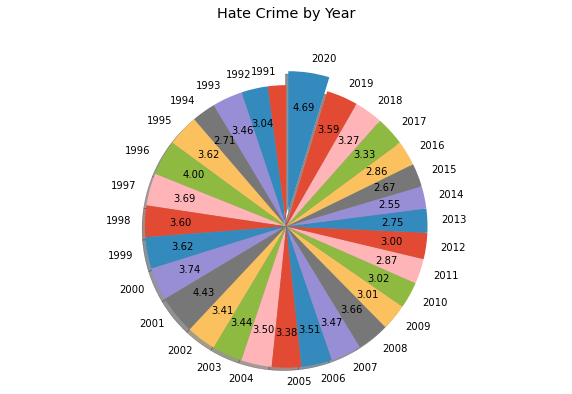

In [21]:
# Pie Chart for Year totals of Hate Crime
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 30)
labels = ["1991", "1992", "1993", "1994", "1995", "1996", '1997', '1998', '1999', '2000', '2001',
         '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
         '2013', '2014', '2015','2016', '2017', '2018', '2019', '2020']
explode = [0] * 30
explode[29] = .1
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2.5 else ''

plt.pie(year_counter, labels = labels, explode=explode, shadow = True, startangle = 90, autopct = my_autopct, pctdistance =.75,)
plt.axis('equal')
plt.title('Hate Crime by Year',y=1.1)
plt.show()